In [5]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [13]:
path = '../../../Data/2025/251209_vanillin_UV-Vis/'
data = import_data(path, '', None, None, None)
print(data.keys())

dict_keys(['250630_Actinic_flux_Fløjstrup-Skov', 'NIST_vanillin_UV-vis'])


In [14]:
data['NIST_vanillin_UV-vis']['Epsilon'] = 10**(data['NIST_vanillin_UV-vis']['Logarithm epsilon'])
display(data['NIST_vanillin_UV-vis'])

data['250630_Actinic_flux_Fløjstrup-Skov']['Wavelength'] = (data['250630_Actinic_flux_Fløjstrup-Skov']['LOWER WVL'] + data['250630_Actinic_flux_Fløjstrup-Skov']['UPPER WVL']) / 2
display(data['250630_Actinic_flux_Fløjstrup-Skov'])

,Wavelength (nm),Logarithm epsilon,Epsilon
0,220.81,3.946,8830.799004
1,221.08,3.957,9057.326009
2,221.34,3.965,9225.714272
3,221.61,3.973,9397.233106
4,221.88,3.980,9549.925860
...,...,...,...
124,345.54,3.120,1318.256739
125,346.88,3.064,1158.777356
126,348.23,2.962,916.220490
127,349.57,2.878,755.092228


,LOWER WVL,UPPER WVL,DIRECT,DIFFUSE DOWN,DIFFUSE UP,TOTAL,Wavelength
0,280,281,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,280.5
1,281,282,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,281.5
2,282,283,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,282.5
3,283,284,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,283.5
4,284,285,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,284.5
...,...,...,...,...,...,...,...
415,695,696,3.907000e+14,1.525000e+14,7.861000e+13,6.218000e+14,695.5
416,696,697,3.930000e+14,1.531000e+14,7.905000e+13,6.251000e+14,696.5
417,697,698,3.904000e+14,1.518000e+14,7.850000e+13,6.207000e+14,697.5
418,698,699,3.886000e+14,1.507000e+14,7.810000e+13,6.174000e+14,698.5


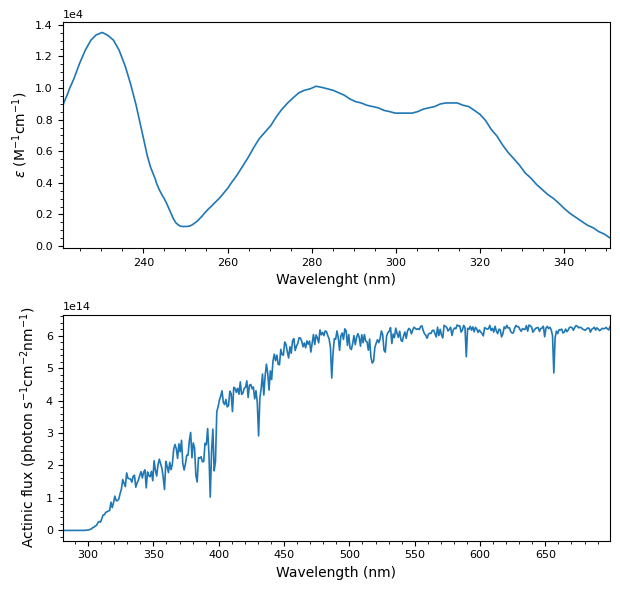

In [15]:
fig, ax = plt.subplots(2, 1, figsize = (6.3, 6))

ax[0].plot(data['NIST_vanillin_UV-vis']['Wavelength (nm)'], data['NIST_vanillin_UV-vis']['Epsilon'])
ax[1].plot(data['250630_Actinic_flux_Fløjstrup-Skov']['Wavelength'], data['250630_Actinic_flux_Fløjstrup-Skov']['TOTAL'])

ax[0].set(xlabel = 'Wavelenght (nm)', ylabel = '$\epsilon$ (M$^{-1}$cm$^{-1}$)')
ax[1].set(xlabel = 'Wavelength (nm)', ylabel = 'Actinic flux (photon s$^{-1}$cm$^{-2}$nm$^{-1}$)')

fig.tight_layout()